In [ ]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_excel(r"C:\Users\91939\OneDrive\Desktop\2021.xlsx")

In [ ]:
data.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [ ]:
data['Temp']=pd.to_numeric(data['Temp'],errors='coerce')
data['D.O. (mg/l)']=pd.to_numeric(data['D.O. (mg/l)'],errors='coerce')
data['PH']=pd.to_numeric(data['PH'],errors='coerce')
data['B.O.D. (mg/l)']=pd.to_numeric(data['B.O.D. (mg/l)'],errors='coerce')
data['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(data['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
data['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(data['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
data['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(data['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
data['FECAL COLIFORM (MPN/100ml)']=pd.to_numeric(data['FECAL COLIFORM (MPN/100ml)'],errors='coerce')

In [ ]:
data.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)          float64
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [ ]:
data.shape

(4285, 12)

In [ ]:
start=0
end=3971
station=data.iloc [start:end ,0]
location=data.iloc [start:end ,1]
state=data.iloc [start:end ,2]
do= data.iloc [start:end ,4].astype(np.float64)
value=0
ph = data.iloc[ start:end,5]
co = data.iloc [start:end ,6].astype(np.float64)

year=data.iloc[start:end,11]
tc=data.iloc [start:end ,10].astype(np.float64)


bod = data.iloc [start:end ,7].astype(np.float64)
na= data.iloc [start:end ,8].astype(np.float64)
na.dtype

dtype('float64')

In [ ]:
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1448,"RIVER NAGAVALI AT THOTAPALLI REGULATOR,\nVIZIA...",ANDHRA PRADESH,32.0,5.9,8.2,400.0,2.0,1.66,15.0,93.0,2021
1,4351,RIVER NAGAVALI IMMEDIATE BORDER BETWEEN ANDHRA...,ANDHRA PRADESH,32.0,8.3,8.5,612.0,2.5,3.02,21.0,150.0,2021
2,4346,"RIVER NAGAVALI NEAR NH- 16 BRIDGE, UPSTREAM (U...",ANDHRA PRADESH,32.0,8.4,8.8,400.0,2.0,3.60,15.0,120.0,2021
3,4347,RIVER NAGAVALI NEAR WATER PUMP HOUSE (KILLIPAL...,ANDHRA PRADESH,32.0,7.5,8.4,648.0,2.3,4.02,15.0,150.0,2021
4,4348,"RIVER VAMSADHARA, IMMEDIATE BORDER BETWEEN AND...",ANDHRA PRADESH,28.0,8.3,8.5,410.0,2.2,2.46,21.0,150.0,2021


In [ ]:
data=pd.concat([station,location,state,do,ph,co,bod,na,tc,year],axis=1)
data. columns = ['station','location','state','do','ph','co','bod','na','tc','year']

In [ ]:
#calculation of PH
data['npH']=data.ph.apply(lambda x: (100 if (8.5>=x>=7)
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8)
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7)
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))

#calculation of Dissolved Oxygen
data['ndo']=data.do.apply(lambda x:(100 if (x>=6)
                                 else(80 if  (6>=x>=5.1)
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3)
                                              else 0)))))

#calculation of Total Coliform
data['nco']=data.tc.apply(lambda x:(100 if (5>=x>=0)
                                 else(80 if  (50>=x>=5)
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500)
                                              else 0)))))

#calc of B.O.D
data['nbod']=data.bod.apply(lambda x:(100 if (3>=x>=0)
                                 else(80 if  (6>=x>=3)
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80)
                                              else 0)))))

#calculation of electrical conductivity
data['nec']=data.co.apply(lambda x:(100 if (75>=x>=0)
                                 else(80 if  (150>=x>=75)
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225)
                                              else 0)))))

#Calulation of nitrate
data['nna']=data.na.apply(lambda x:(100 if (20>=x>=0)
                                 else(80 if  (50>=x>=20)
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100)
                                              else 0)))))

In [ ]:
data.head()

,station,location,state,do,ph,co,bod,na,tc,year,npH,ndo,nco,nbod,nec,nna
0,1448,"RIVER NAGAVALI AT THOTAPALLI REGULATOR,\nVIZIA...",ANDHRA PRADESH,5.9,8.2,400.0,2.0,1.66,93.0,2021,100,80,60,100,0,100
1,4351,RIVER NAGAVALI IMMEDIATE BORDER BETWEEN ANDHRA...,ANDHRA PRADESH,8.3,8.5,612.0,2.5,3.02,150.0,2021,100,100,60,100,0,100
2,4346,"RIVER NAGAVALI NEAR NH- 16 BRIDGE, UPSTREAM (U...",ANDHRA PRADESH,8.4,8.8,400.0,2.0,3.60,120.0,2021,60,100,60,100,0,100
3,4347,RIVER NAGAVALI NEAR WATER PUMP HOUSE (KILLIPAL...,ANDHRA PRADESH,7.5,8.4,648.0,2.3,4.02,150.0,2021,100,100,60,100,0,100
4,4348,"RIVER VAMSADHARA, IMMEDIATE BORDER BETWEEN AND...",ANDHRA PRADESH,8.3,8.5,410.0,2.2,2.46,150.0,2021,100,100,60,100,0,100


In [ ]:
data.dtypes

station      object
location     object
state        object
do          float64
ph          float64
co          float64
bod         float64
na          float64
tc          float64
year          int64
npH           int64
ndo           int64
nco           int64
nbod          int64
nec           int64
nna           int64
dtype: object

In [ ]:
data['wph']=data.npH * 0.165
data['wdo']=data.ndo * 0.281
data['wbod']=data.nbod * 0.234
data['wec']=data.nec* 0.009
data['wna']=data.nna * 0.028
data['wco']=data.nco * 0.281
data['wqi']=data.wph+data.wdo+data.wbod+data.wec+data.wna+data.wco
data

,station,location,state,do,ph,co,bod,na,tc,year,...,nbod,nec,nna,wph,wdo,wbod,wec,wna,wco,wqi
0,1448,"RIVER NAGAVALI AT THOTAPALLI REGULATOR,\nVIZIA...",ANDHRA PRADESH,5.9,8.2,400.0,2.0,1.66,93.0,2021,...,100,0,100,16.5,22.48,23.4,0.00,2.8,16.86,82.04
1,4351,RIVER NAGAVALI IMMEDIATE BORDER BETWEEN ANDHRA...,ANDHRA PRADESH,8.3,8.5,612.0,2.5,3.02,150.0,2021,...,100,0,100,16.5,28.10,23.4,0.00,2.8,16.86,87.66
2,4346,"RIVER NAGAVALI NEAR NH- 16 BRIDGE, UPSTREAM (U...",ANDHRA PRADESH,8.4,8.8,400.0,2.0,3.60,120.0,2021,...,100,0,100,9.9,28.10,23.4,0.00,2.8,16.86,81.06
3,4347,RIVER NAGAVALI NEAR WATER PUMP HOUSE (KILLIPAL...,ANDHRA PRADESH,7.5,8.4,648.0,2.3,4.02,150.0,2021,...,100,0,100,16.5,28.10,23.4,0.00,2.8,16.86,87.66
4,4348,"RIVER VAMSADHARA, IMMEDIATE BORDER BETWEEN AND...",ANDHRA PRADESH,8.3,8.5,410.0,2.2,2.46,150.0,2021,...,100,0,100,16.5,28.10,23.4,0.00,2.8,16.86,87.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3966,1633,"SIMSANG RIVER WILLIAMNAGAR, MEGHALAYA",NAN,7.0,7.0,161.0,1.7,2.43,375.0,2007,...,100,60,100,16.5,28.10,23.4,0.54,2.8,16.86,88.20
3967,1403,"GUMTI AT U/S SOUTH TRIPURA, TRIPURA",NAN,5.2,7.4,120.0,1.4,0.05,280.0,2007,...,100,80,100,16.5,22.48,23.4,0.72,2.8,16.86,82.76
3968,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,4.7,7.4,139.0,NaN,0.11,440.0,2007,...,0,80,100,16.5,16.86,0.0,0.72,2.8,16.86,53.74
3969,1726,"CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA",NAN,5.4,7.4,128.0,3.0,0.06,565.0,2007,...,100,80,100,16.5,22.48,23.4,0.72,2.8,11.24,77.14


In [ ]:
#calculation overall wqi for each year
ag=data.groupby('year')['wqi'].mean()

In [ ]:
ag.head()

year
2007    72.549000
2008    72.570943
2009    74.085193
2010    74.648723
2011    75.647013
Name: wqi, dtype: float64

In [ ]:
ag

year
2007    72.549000
2008    72.570943
2009    74.085193
2010    74.648723
2011    75.647013
2012    78.969041
2013    75.009425
2014    76.853551
2015    76.892862
2016    76.970838
2017    77.262184
2018    77.737185
2019    78.537772
2020    79.339130
2021    81.069845
Name: wqi, dtype: float64

In [ ]:
data=ag.reset_index(level=0,inplace=False)
data

,year,wqi
0,2007,72.549000
1,2008,72.570943
2,2009,74.085193
3,2010,74.648723
4,2011,75.647013
5,2012,78.969041
6,2013,75.009425
7,2014,76.853551
8,2015,76.892862
9,2016,76.970838


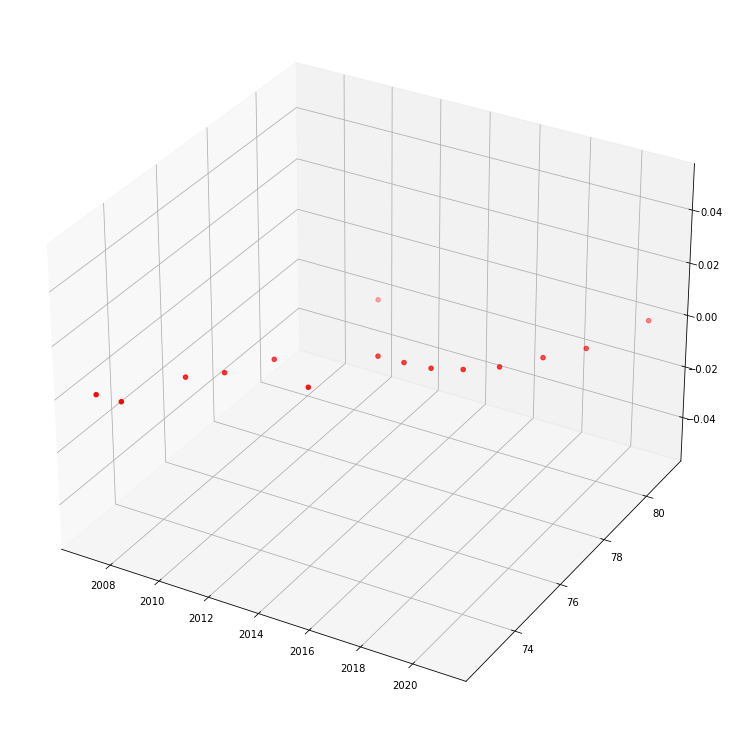

,year,wqi
0,2007,72.549000
1,2008,72.570943
2,2009,74.085193
3,2010,74.648723
4,2011,75.647013
5,2012,78.969041
6,2013,75.009425
7,2014,76.853551
8,2015,76.892862
9,2016,76.970838


In [ ]:
year=data['year'].values
AQI=data['wqi'].values
data['wqi']=pd.to_numeric(data['wqi'],errors='coerce')
data['year']=pd.to_numeric(data['year'],errors='coerce')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(year,AQI, color='red')
plt.show()
data

In [ ]:
data = data[np.isfinite(data['wqi'])]
data.head()

,year,wqi
0,2007,72.549000
1,2008,72.570943
2,2009,74.085193
3,2010,74.648723
4,2011,75.647013


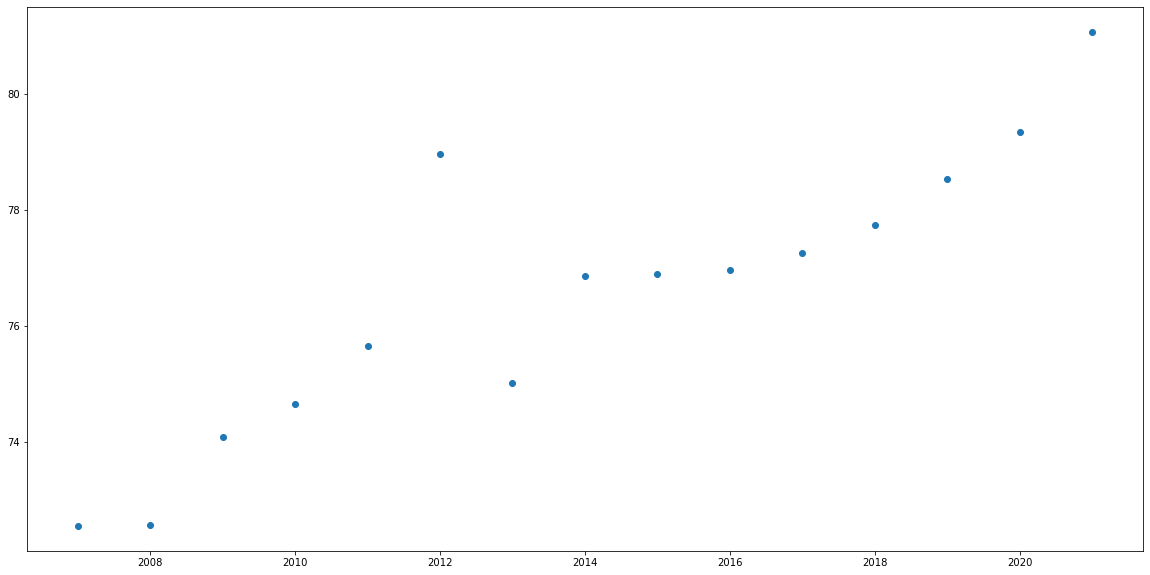

In [ ]:
#scatter plot of data points
cols =['year']
y = data['wqi']
x=data[cols]

plt.scatter(x,y)
plt.show()

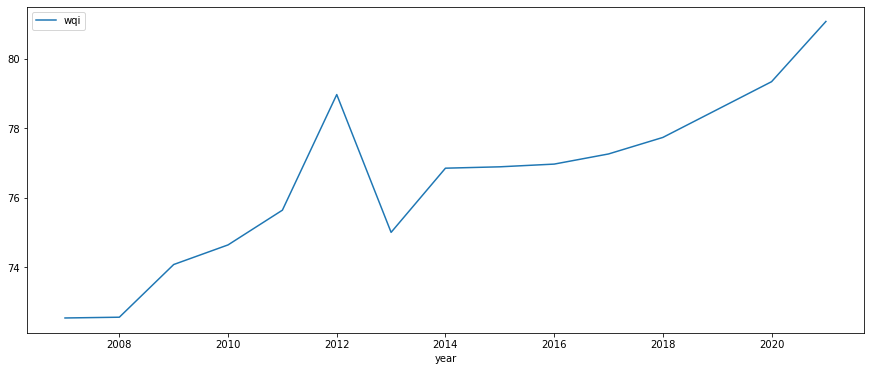

In [ ]:
import matplotlib.pyplot as plt
data=data.set_index('year')
data.plot(figsize=(15,6))
plt.show()

In [ ]:
data=data.reset_index(level=0,inplace=False)
data

,year,wqi
0,2007,72.549000
1,2008,72.570943
2,2009,74.085193
3,2010,74.648723
4,2011,75.647013
5,2012,78.969041
6,2013,75.009425
7,2014,76.853551
8,2015,76.892862
9,2016,76.970838


In [ ]:
results=[]
names=[]
errors=[]

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
x=data[['year']]
y = data['wqi']
reg=linear_model.LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
x_pred=reg.predict(x_test)
print(y_test)
print(x_pred)
linear_reg=pd.DataFrame()
linear_reg['Actual']=np.array(y_test)
linear_reg['Predicted']=x_pred

12    78.537772
0     72.549000
6     75.009425
Name: wqi, dtype: float64
[79.09898275 73.38502858 76.24200566]


In [ ]:
linear_reg

,Actual,Predicted
0,78.537772,79.098983
1,72.549000,73.385029
2,75.009425,76.242006


In [ ]:
import sklearn.metrics as sm
print('mse:%.4f'%sm.mean_squared_error(x_pred,y_test))
print("R2 score =", round(sm.r2_score(x_pred,y_test), 2))

mse:0.8444
R2 score = 0.84


In [ ]:
names.append('Linear Regression')
results.append(sm.r2_score(x_pred,y_test))
errors.append(sm.mean_squared_error(x_pred,y_test))

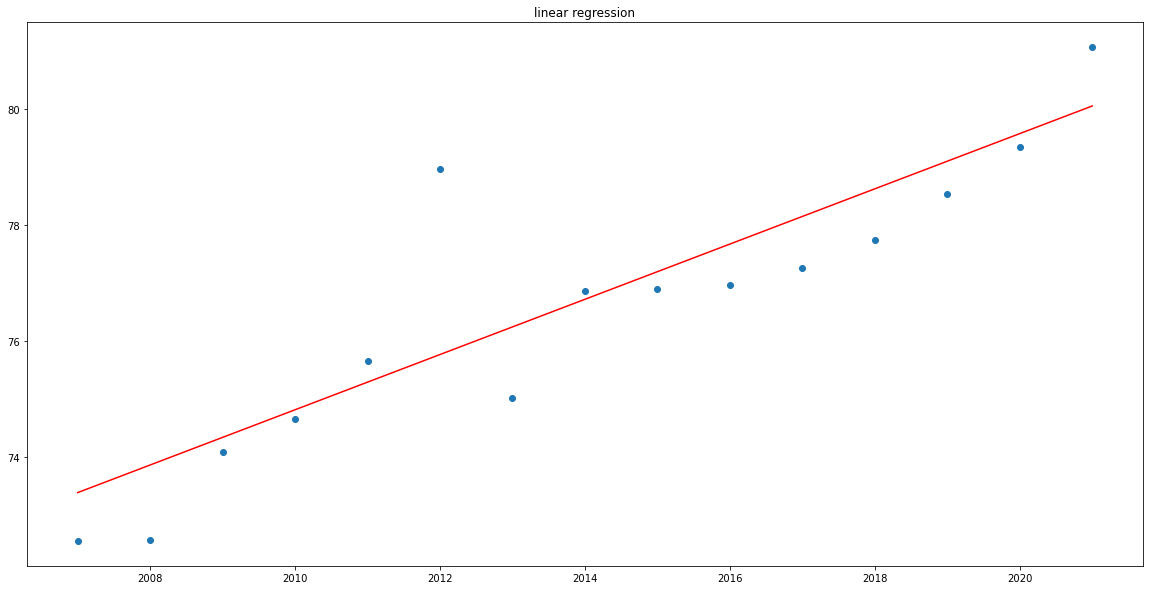

In [ ]:
#plotting the actual and predicted results
x_axis=x
y_axis=y
y1_axis=reg.predict(x)
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,y1_axis,color='r')
plt.title("linear regression")

plt.show()

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
x=data[['year']]
y = data['wqi']
reg=linear_model.LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg= PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x_train)
reg.fit(x_poly,y_train)

LinearRegression()

In [ ]:
y_pred_pr = reg.predict(poly_reg.fit_transform(x_test))

In [ ]:
poly_reg

PolynomialFeatures()

In [ ]:
import sklearn.metrics as sm
print('mse:%.2f'%sm.mean_squared_error(y_pred_pr,y_test))
print("R2 score =", round(sm.r2_score(y_pred_pr,y_test), 2))

mse:0.80
R2 score = 0.87


In [ ]:
names.append('Polynomial Regression')
results.append(sm.r2_score(y_pred_pr,y_test))
errors.append(sm.mean_squared_error(y_pred_pr,y_test))

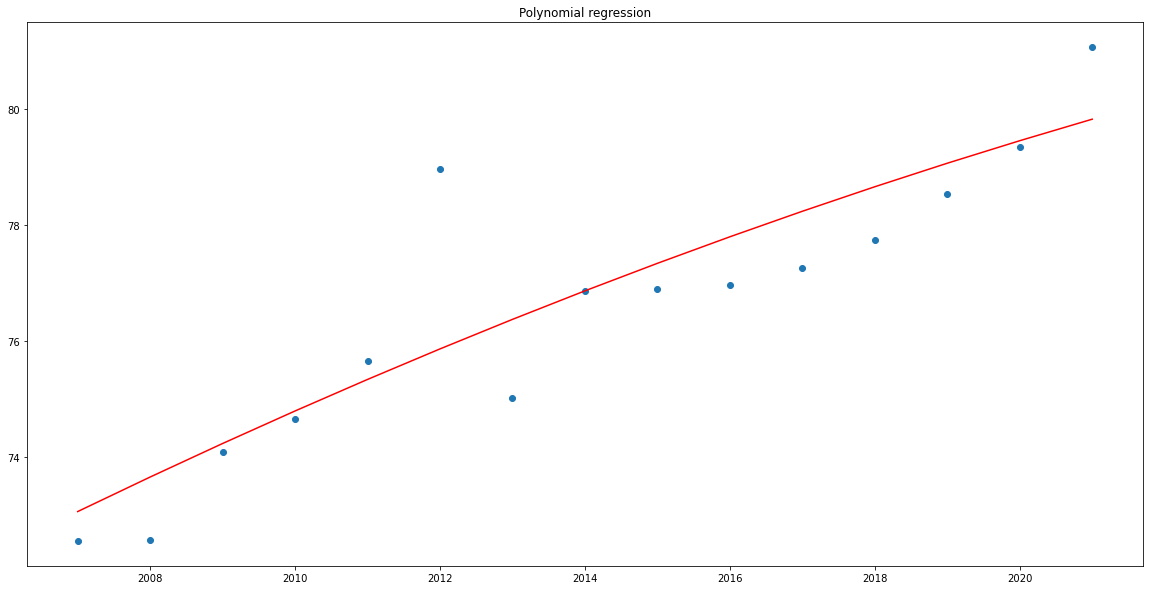

In [ ]:
x_axis=x
y_axis=y
y1_axis=reg.predict(poly_reg.fit_transform(x))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,y1_axis,color='r')
plt.title("Polynomial regression")
plt.show()

In [ ]:
x_svr=data.iloc[:,0].values
y_svr=data.iloc[:,1].values

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [ ]:
scaled_X = StandardScaler()
scaled_y = StandardScaler()

scaled_x = scaled_X.fit_transform(x_svr.reshape(-1,1))
scaled_y = scaled_y.fit_transform(y_svr.reshape(-1,1))

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_svr,y_svr,test_size=0.20,random_state=0)

In [ ]:
svr_regressor = SVR(kernel='linear', gamma='auto')
svr_regressor.fit(x_train.reshape(-1,1), y_train.ravel())

SVR(gamma='auto', kernel='linear')

In [ ]:
y_pred=svr_regressor.predict(x_test.reshape(-1,1))
print(y_test)
print(y_pred)
svr=pd.DataFrame()
svr['Actual']=np.array(y_test)
svr['Predicted']=y_pred

[72.5709434  75.00942529 76.89286195]
[73.610642   75.95584551 76.89392692]


In [ ]:
import sklearn.metrics as sm
print('mse:%.4f'%sm.mean_squared_error(y_pred,y_test.ravel()))
print("R2 score =", round(sm.r2_score(y_pred,y_test),2))

mse:0.6589
R2 score = 0.65


In [ ]:
names.append('Support vector Regression')
results.append(sm.r2_score(y_pred,y_test.ravel()))
errors.append(sm.mean_squared_error(y_pred,y_test))

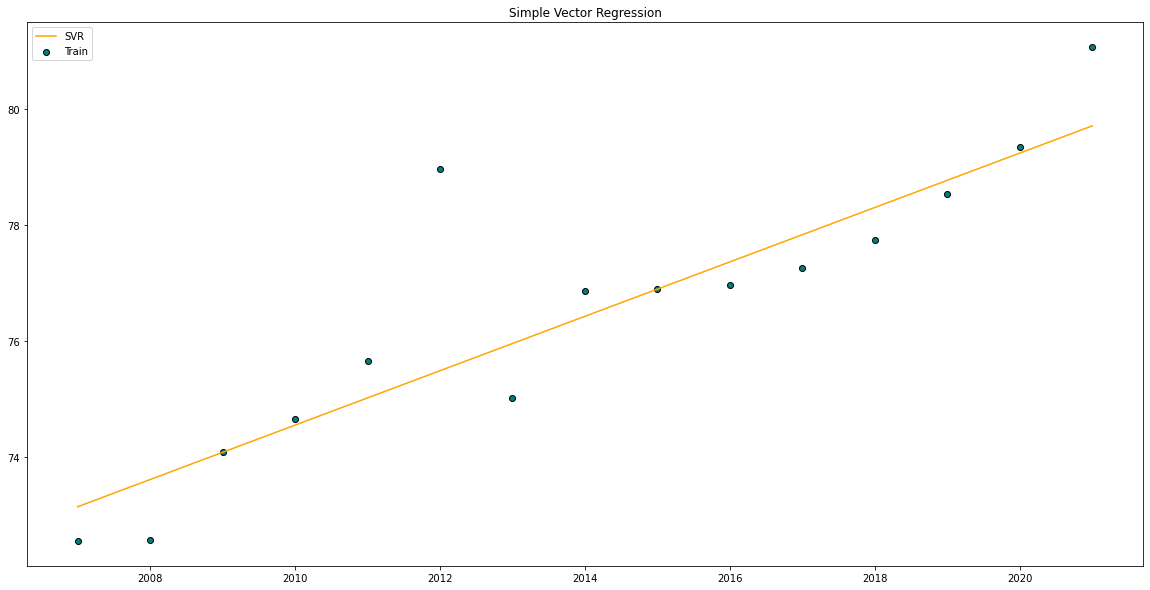

In [ ]:
plt.scatter(x_svr, y_svr, color='teal', edgecolors='black', label='Train')
plt.plot(x_svr, svr_regressor.predict(x_svr.reshape(-1,1)), color='orange', label='SVR')
plt.title('Simple Vector Regression')
plt.legend()
plt.show()

In [ ]:
x_r=data.iloc[:,0].values
y_r=data.iloc[:,1].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_r,y_r,test_size=0.2,random_state=4)

In [ ]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV()
ridge.fit(x_train.reshape(-1,1), y_train.ravel())

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [ ]:
y_pred=ridge.predict(x_test.reshape(-1,1))
print(y_test)
print(y_pred)

[78.53777202 72.549      75.00942529]
[79.09787593 73.38671793 76.24229693]


In [ ]:
import sklearn.metrics as sm
print('mse:%.4f'%sm.mean_squared_error(y_pred,y_test.ravel()))
print("R2 score =", round(sm.r2_score(y_pred,y_test),2))

mse:0.8452
R2 score = 0.84


In [ ]:
names.append('Ridge Regression')
results.append(sm.r2_score(y_pred,y_test))
errors.append(sm.mean_squared_error(y_pred,y_test))

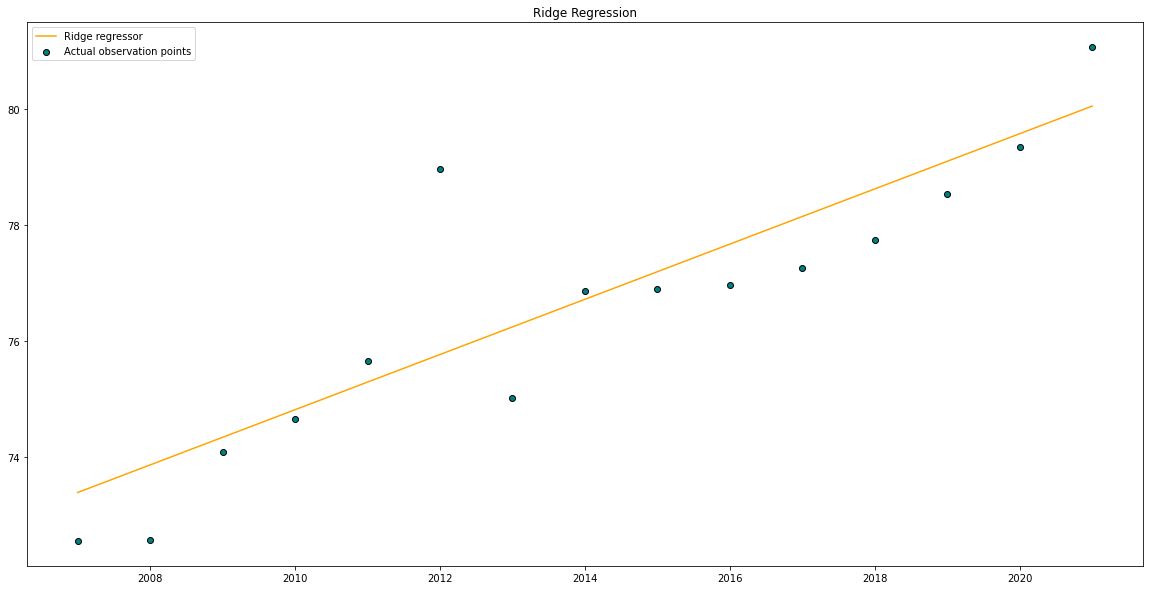

In [ ]:
plt.scatter(x_r, y_r, color='teal', edgecolors='black', label='Actual observation points')
plt.plot(x_r, ridge.predict(x_r.reshape(-1,1)), color='orange', label='Ridge regressor')
plt.title('Ridge Regression')
plt.legend()
plt.show()

In [ ]:
x_l=data.iloc[:,0].values
y_l=data.iloc[:,1].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_l,y_l,test_size=0.2,random_state=4)

In [ ]:
from sklearn.linear_model import LassoCV
lasso = LassoCV()
lasso.fit(x_train.reshape(-1,1), y_train.ravel())

LassoCV()

In [ ]:
y_pred=lasso.predict(x_test.reshape(-1,1))
print(y_test)
print(y_pred)

[78.53777202 72.549      75.00942529]
[79.0646058  73.43749865 76.25105223]


In [ ]:
import sklearn.metrics as sm
print('mse:%.4f'%sm.mean_squared_error(y_pred,y_test.ravel()))
print("R2 score =", round(sm.r2_score(y_pred,y_test),2))

mse:0.8695
R2 score = 0.84


In [ ]:
names.append('Lasso Regression')
results.append(sm.r2_score(y_pred,y_test))
errors.append(sm.mean_squared_error(y_pred,y_test))

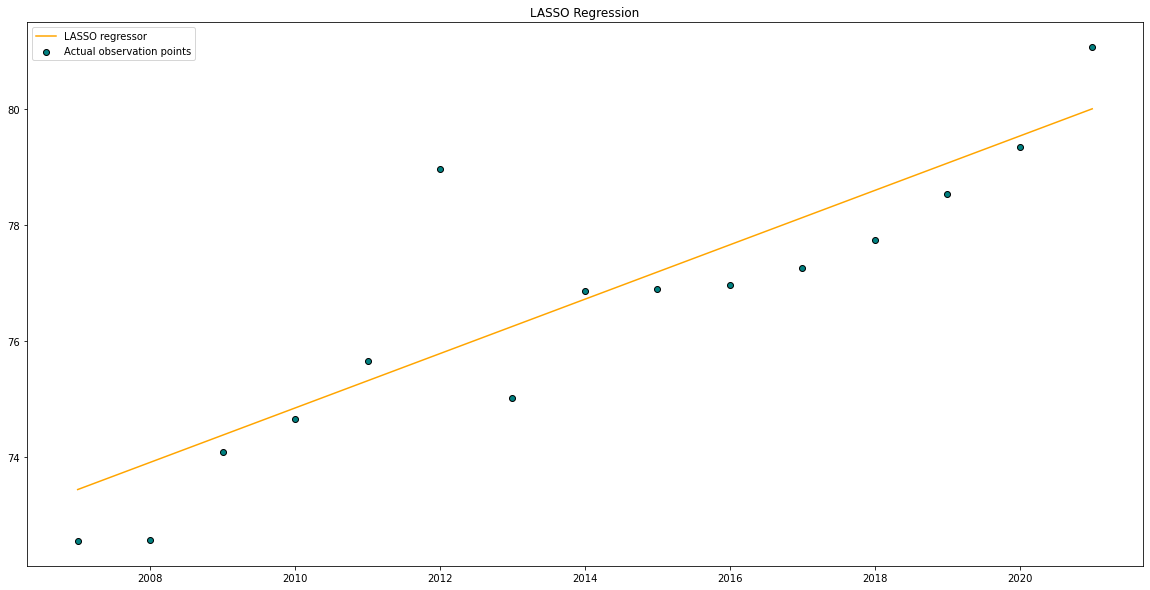

In [ ]:
plt.scatter(x_l, y_l, color='teal', edgecolors='black', label='Actual observation points')
plt.plot(x_l, lasso.predict(x_l.reshape(-1,1)), color='orange', label='LASSO regressor')
plt.title('LASSO Regression')
plt.legend()
plt.show()

In [ ]:
x_en=data.iloc[:,0].values
y_en=data.iloc[:,1].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_en,y_en,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import ElasticNetCV
elasticNet = ElasticNetCV(cv=3)  #l1_ratio=0.6
elasticNet.fit(x_train.reshape(-1,1), y_train.ravel())

ElasticNetCV(cv=3)

In [ ]:
y_pen=elasticNet.predict(x_test.reshape(-1,1))
print(y_pen)
print(y_test)

[77.68247949 78.66544204 73.25914799]
[76.97083832 77.73718519 72.549     ]


In [ ]:
import sklearn.metrics as sm
print('mse:%.2f'%sm.mean_squared_error(y_pen,y_test.ravel()))
print("R2 score =", round(sm.r2_score(y_pen,y_test),2))

mse:0.62
R2 score = 0.89


In [ ]:
names.append('Elastic Net Regression')
results.append(sm.r2_score(y_pen,y_test))
errors.append(sm.mean_squared_error(y_pen,y_test))

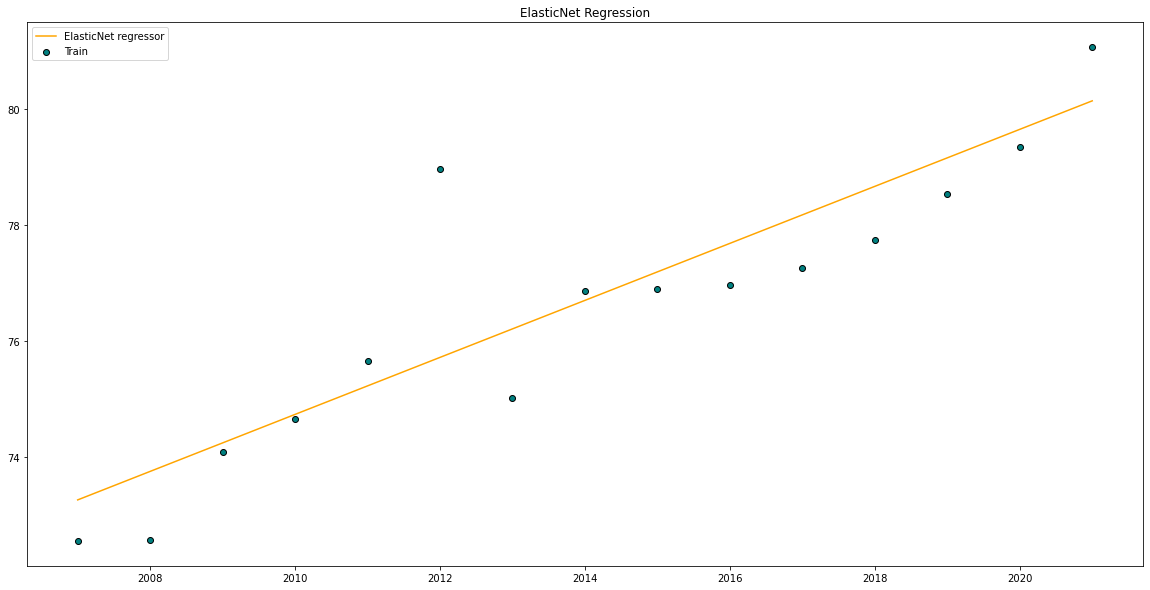

In [ ]:
plt.scatter(x_en, y_en, color='teal', edgecolors='black', label='Train')
plt.plot(x_en, elasticNet.predict(x_en.reshape(-1,1)), color='orange',label='ElasticNet regressor')
plt.title('ElasticNet Regression')
plt.legend()
plt.show()

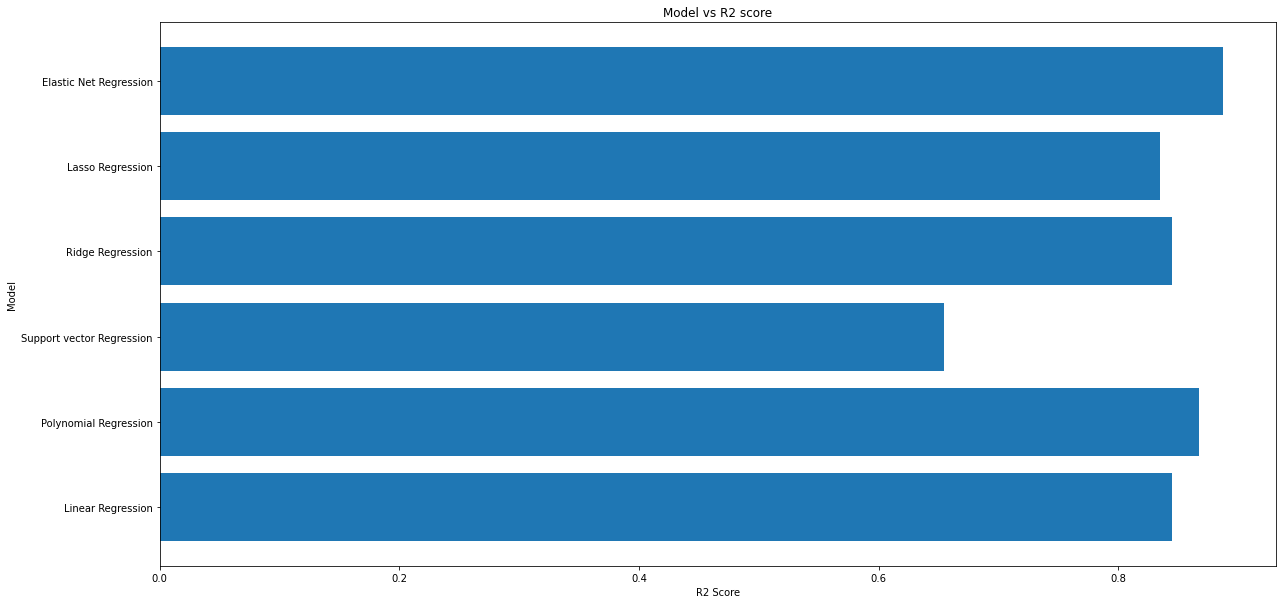

In [ ]:
plt.barh(names, results)
plt.ylabel("Model")
plt.xlabel("R2 Score")
plt.title("Model vs R2 score")
plt.show()

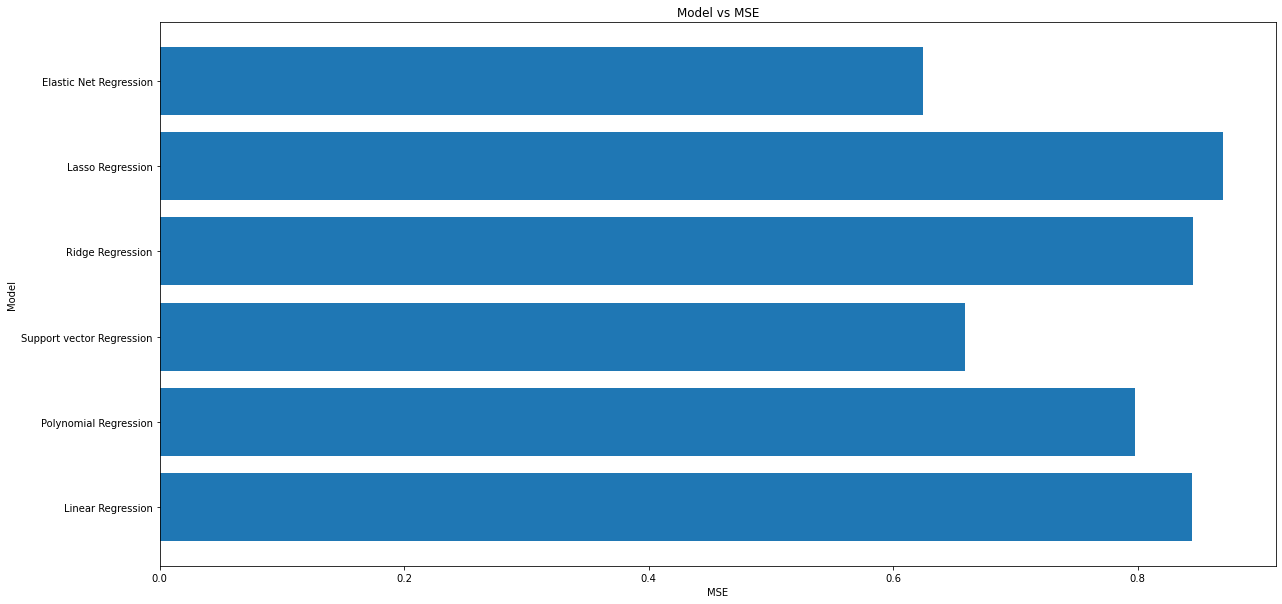

In [ ]:
plt.barh(names, errors)
plt.ylabel("Model")
plt.xlabel("MSE")
plt.title("Model vs MSE")
plt.show()

In [ ]:
Results=pd.DataFrame()
Results['Model']=names
Results['R2 Score']=results
Results['Mean squared error']=errors

In [ ]:
Results

,Model,R2 Score,Mean squared error
0,Linear Regression,0.844826,0.844385
1,Polynomial Regression,0.867802,0.797668
2,Support vector Regression,0.654424,0.658895
3,Ridge Regression,0.844533,0.845153
4,Lasso Regression,0.835233,0.869540
5,Elastic Net Regression,0.887114,0.624135


In [ ]:
import pickle

with open('water_pred_model.pkl', 'wb') as files:
    pickle.dump(elasticNet, files)